In [1]:
import pandas as pd
x=pd.read_csv('/content/power_load.csv')
print(x)

       Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0           3.17                                  2.95   
1           4.00                                  4.46   
2           3.24                                  3.28   
3           3.31                                  3.56   
4           3.82                                  4.50   
...          ...                                   ...   
35035       3.85                                  4.86   
35036       3.74                                  3.74   
35037       3.78                                  3.17   
35038       3.78                                  3.06   
35039       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4            

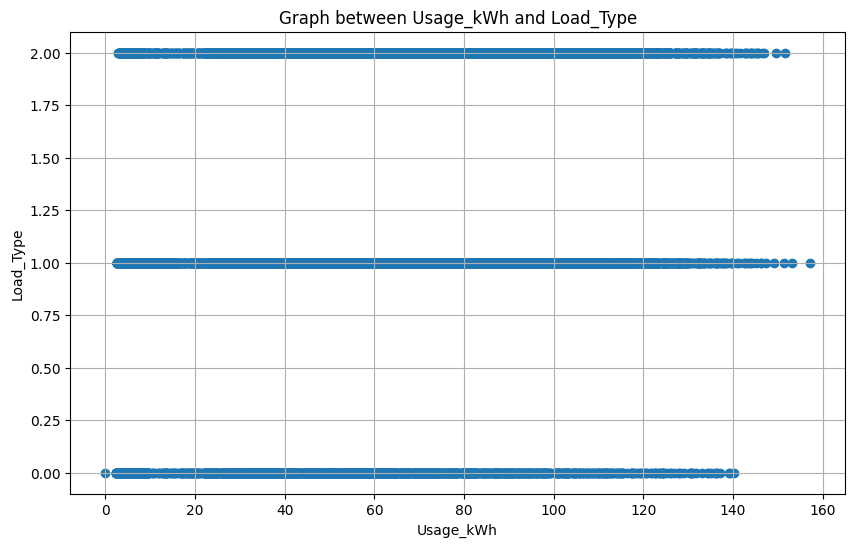

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/power_load.csv')

# Plot a graph between the Usage_kWh feature and the Load_Type target variable
plt.figure(figsize=(10, 6))
plt.scatter(data['Usage_kWh'], data['Load_Type'])
plt.xlabel('Usage_kWh')
plt.ylabel('Load_Type')
plt.title('Graph between Usage_kWh and Load_Type')
plt.grid(True)
plt.show()

Mean Squared Error: 0.3995648799447265


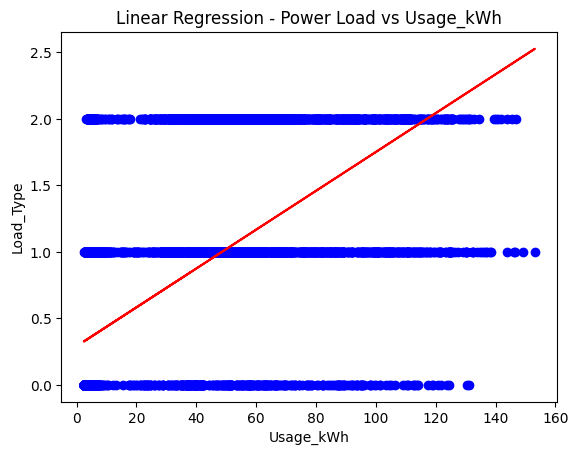

Accuracy: 0.6284246575342466
R-squared: 0.37185320650082987


In [3]:
#LINEAR REGRESSION

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/power_load.csv')  # Replace 'power_load_dataset.csv' with the name of your dataset file

# Assuming your dataset has 'temperature' as input feature and 'power_load' as output
X = data[['Usage_kWh']]
y = data['Load_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the regression line
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression - Power Load vs Usage_kWh')
plt.xlabel('Usage_kWh')
plt.ylabel('Load_Type')
plt.show()
from sklearn.metrics import r2_score

# Convert predicted values to integer classes
y_pred_classes = y_pred.round().astype(int)

# Calculate accuracy
accuracy = (y_pred_classes == y_test).mean()
print('Accuracy:', accuracy)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)



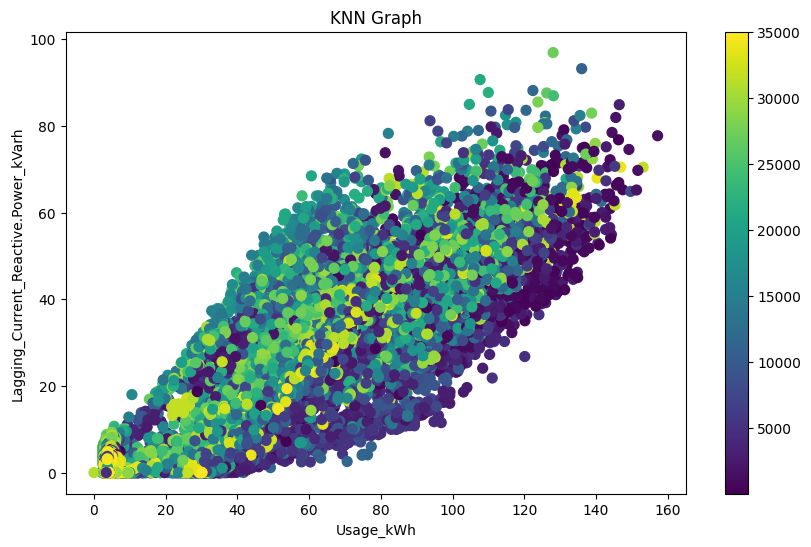

R-squared value: -33.25134835861051


In [4]:
#K-NEAREST NEIGHBOUR

# Import necessary libraries
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("power_load.csv")

# Select relevant columns for analysis
X = data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']]

# Create a KNN graph
knn = NearestNeighbors(n_neighbors=5)  # Define the number of neighbors
knn.fit(X)
distances, indices = knn.kneighbors(X)

# Plot the KNN graph
plt.figure(figsize=(10, 6))
plt.scatter(X['Usage_kWh'], X['Lagging_Current_Reactive.Power_kVarh'], c=indices[:, 1], cmap='viridis', s=50)
plt.xlabel('Usage_kWh')
plt.ylabel('Lagging_Current_Reactive.Power_kVarh')
plt.colorbar()
plt.title('KNN Graph')
plt.show()

# Calculate R-squared value
y = data['Leading_Current_Reactive_Power_kVarh']
r_squared = r2_score(y, data['Usage_kWh'])
print("R-squared value:", r_squared)

R-squared value: 0.8818751235117082


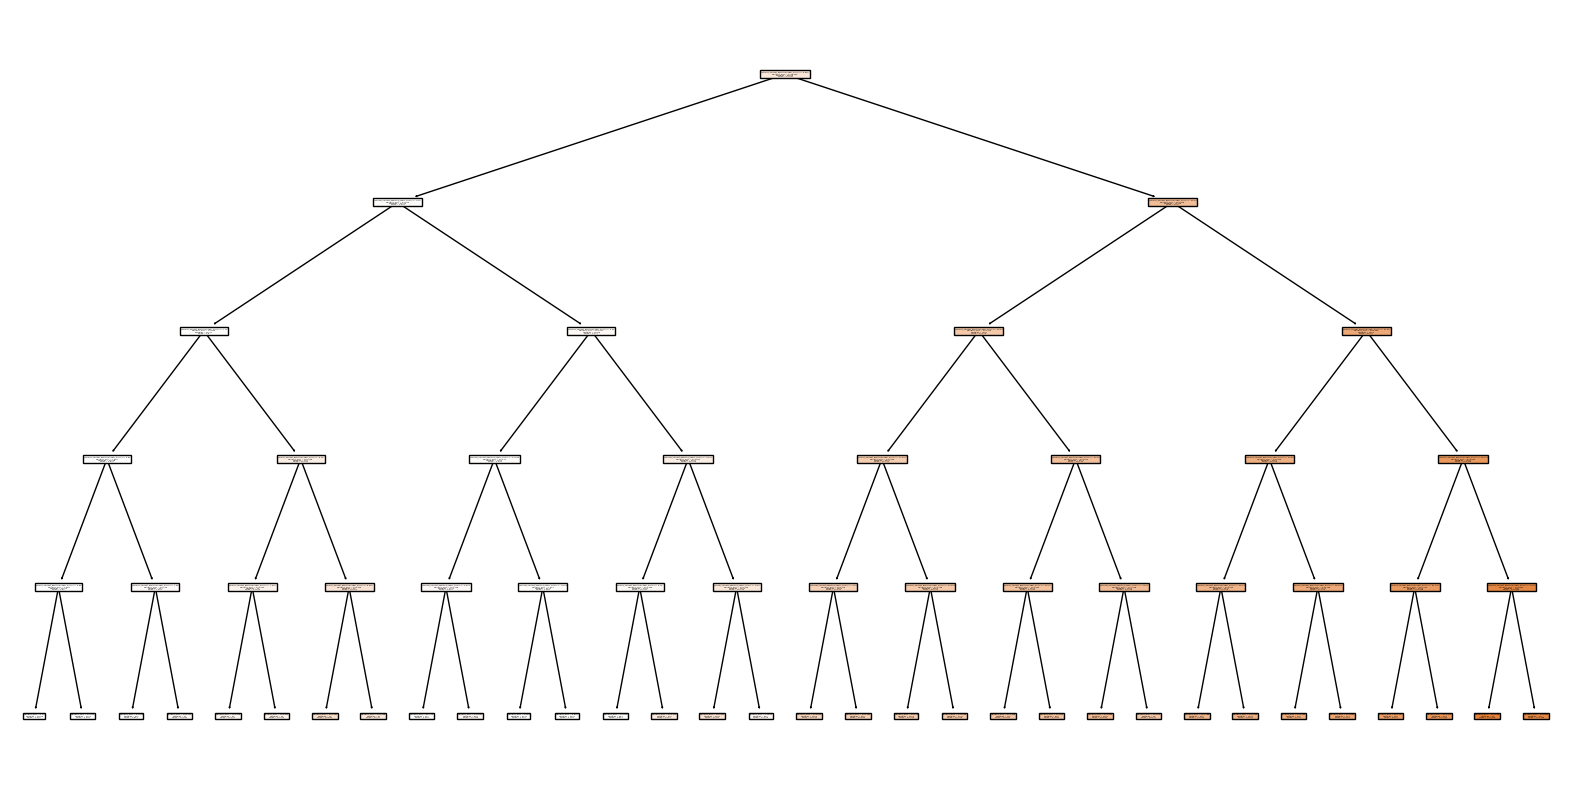

In [9]:
#DECISION TREE

# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
data = pd.read_csv("power_load.csv")

# Select the relevant columns
X = data[['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']]
y = data['Usage_kWh']

# Create a Decision Tree Regressor with optimized parameters
decision_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
decision_tree.fit(X, y)

# Make predictions
y_pred = decision_tree.predict(X)

# Calculate R-squared value
r_squared = r2_score(y, y_pred)
print("R-squared value:", r_squared)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, feature_names=X.columns, filled=True)
plt.savefig("decision_tree_graph.png")

R-squared value: 0.7872015747978832


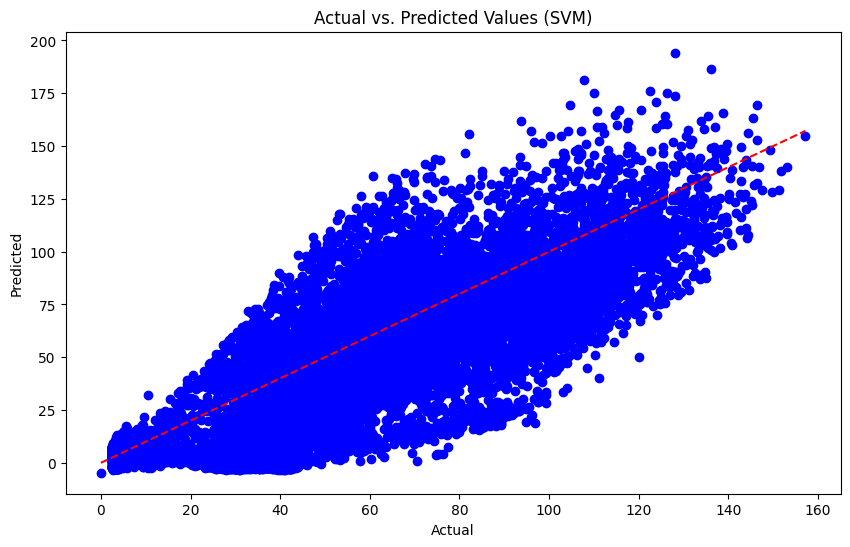

In [6]:
#SUPPORT VECTOR MACHINE

# Import necessary libraries
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("power_load.csv")

# Select the relevant columns
X = data[['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']]
y = data['Usage_kWh']

# Create a Support Vector Machine Regressor
svm = SVR(kernel='linear')
svm.fit(X, y)

# Make predictions
y_pred = svm.predict(X)

# Calculate R-squared value
r_squared = r2_score(y, y_pred)
print("R-squared value:", r_squared)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (SVM)')
plt.show()

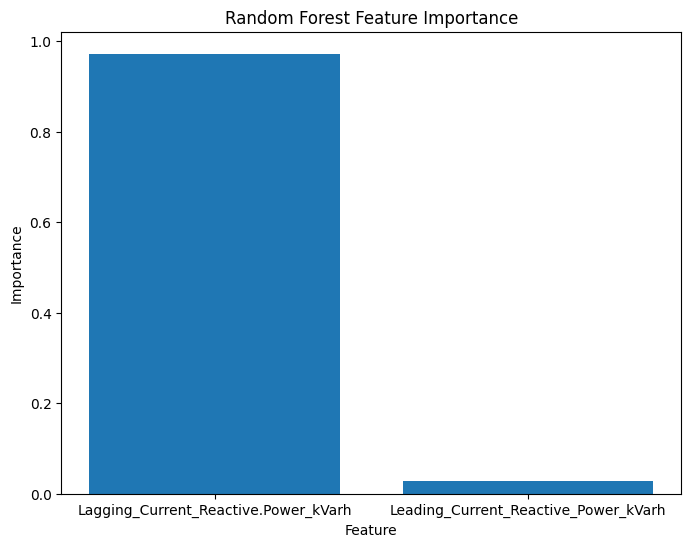

R-squared value: 0.9156602942897757


In [7]:
#RANDOM FOREST

# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("power_load.csv")

# Select the relevant columns
X = data[['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']]
y = data['Usage_kWh']

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Create a feature importance plot
feature_importances = rf.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Calculate R-squared value
y_pred = rf.predict(X)
r_squared = r2_score(y, y_pred)
print("R-squared value:", r_squared)

R-squared value: 0.2822909983740485


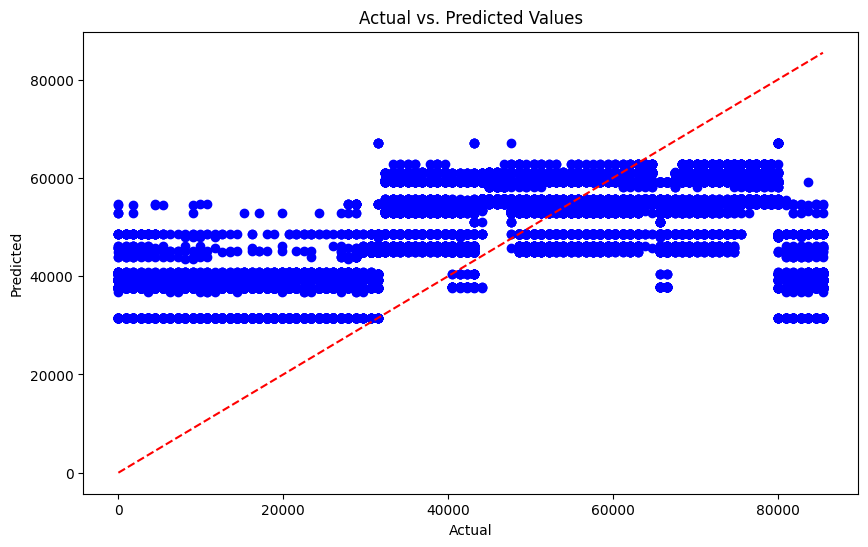

In [8]:
#ADABOOST

# Import necessary libraries
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("power_load.csv")

# Drop the "Load_Type" column
data = data.drop("Load_Type", axis=1)

# Split the data into features and target
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

# Create an AdaBoost Regressor
adaboost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost.fit(X, y)

# Make predictions
y_pred = adaboost.predict(X)

# Calculate R-squared value
r_squared = r2_score(y, y_pred)
print("R-squared value:", r_squared)

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()